<a href="https://colab.research.google.com/github/hatchdavid1/dev.f_master_data_science/blob/main/kulstera_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

In [3]:
e = pd.read_csv('/content/drive/MyDrive/Códigos_Python/DEV.F/klustera/e.csv')
v = pd.read_csv('/content/drive/MyDrive/Códigos_Python/DEV.F/klustera/v.csv')
e.drop(columns = ['Unnamed: 0'], inplace = True)
v.drop(columns = ['Unnamed: 0'], inplace = True )

In [4]:
e.head()

,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses
0,00:00:00:6a:17:ce,1,11,2,Wednesday,0,True,2676
1,00:00:00:6a:17:ce,1,11,2,Wednesday,1,True,2676
2,00:00:00:6a:78:ae,1,10,30,Sunday,20,False,0
3,00:00:02:fa:9c:12,1,11,13,Sunday,12,True,2272
4,00:00:08:7d:e2:58,3,11,4,Friday,19,False,0


In [5]:
v.head()

,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,tiempodeses
0,a8:81:95:56:31:3c,1,11,17,Thursday,4,0
1,44:6e:e5:1b:68:81,3,11,3,Thursday,22,477
2,0c:b3:19:10:78:17,3,11,12,Saturday,10,0
3,44:74:6c:0a:20:23,3,11,27,Sunday,21,0
4,ac:5f:3e:c8:dc:35,1,11,27,Sunday,16,0


In [6]:
# Preguntas para resolver la problemática 
#Filtrar por visitantes = True | agrupando por día | colapsando por tiempodeses
#Comprobar si los meses en ambos datasets son los mismos
#Qué sucursal es la más visitada y en qué día ocurre el mayor número de visitas 
#Qué sucursal tiene mayor permanencia por día

In [8]:
v_e = pd.merge(v,e[['device_mac', 'visitor']], on = 'device_mac', how = 'left')
print(e.shape, v.shape, v_e.shape)
v_e.head()

(249556, 8) (90000, 7) (2201331, 8)


,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,tiempodeses,visitor
0,a8:81:95:56:31:3c,1,11,17,Thursday,4,0,False
1,44:6e:e5:1b:68:81,3,11,3,Thursday,22,477,False
2,44:6e:e5:1b:68:81,3,11,3,Thursday,22,477,False
3,44:6e:e5:1b:68:81,3,11,3,Thursday,22,477,True
4,44:6e:e5:1b:68:81,3,11,3,Thursday,22,477,True


In [9]:
v_e_1 = v_e.copy()
v_e_1.drop_duplicates(inplace = True)

In [19]:

v_e_false =v_e_1[v_e_1.visitor == 0]
v_e_false.head()

,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,tiempodeses,visitor
0,a8:81:95:56:31:3c,1,11,17,Thursday,4,0,False
1,44:6e:e5:1b:68:81,3,11,3,Thursday,22,477,False
31,0c:b3:19:10:78:17,3,11,12,Saturday,10,0,False
33,44:74:6c:0a:20:23,3,11,27,Sunday,21,0,False
37,7c:f9:0e:63:f9:07,1,10,29,Saturday,14,284,False


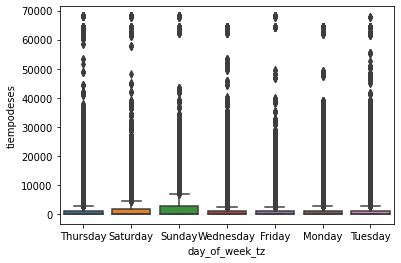

In [23]:
v_e_false.fillna(0, inplace = True)
ax = sns.boxplot(x="day_of_week_tz", y="tiempodeses", data=v_e_false)

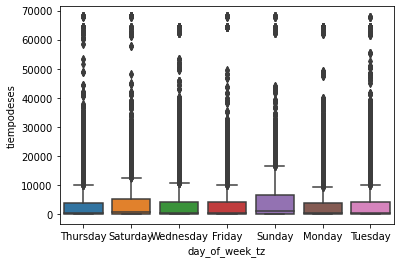

In [25]:
v_e_true =v_e_1[v_e_1.visitor == 1]
ax = sns.boxplot(x="day_of_week_tz", y="tiempodeses", data=v_e_true)

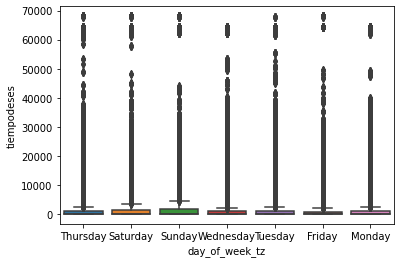

In [24]:
ax = sns.boxplot(x="day_of_week_tz", y="tiempodeses", data=v_e_1)